In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X = np.genfromtxt("3PCFiso_FB_s.dat",delimiter = ',')
puntos = X[:,0]
tiempo = X[:,1]

In [24]:
def f(x,a,b):
    return (a*x**b)

from scipy.optimize import curve_fit
pars, cov = curve_fit(f=f, xdata=puntos, ydata=tiempo, p0=[100,0.0005], bounds=(-np.inf, np.inf))

x_fit = np.arange(0,20000,1)
y_fit = f(x_fit,*pars)
a,b = pars[0],pars[1]

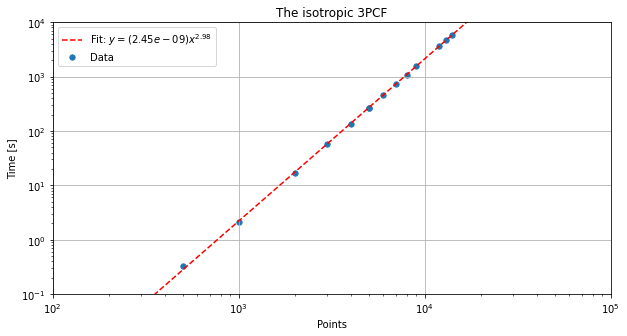

In [25]:
plt.figure(figsize=(10,5))
#plt.plot(puntos,tiempo,color = "black",
#linestyle="-",marker = 'o', markerfacecolor = "blue",markersize = 8)
plt.grid()
plt.scatter(puntos, tiempo, marker = "o", s=28, label="Data")
plt.plot(x_fit,y_fit, linestyle="--", color="red", label=r"Fit: $y = (%.2e) x^{%.2f}$"%(a,b))
#plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Points")
plt.ylim([10**(-1),10**(4)])
plt.xlim([10**(2),10**(5)])
plt.ylabel("Time [s]")
plt.legend(loc="best")
plt.title("The isotropic 3PCF")
plt.savefig("3PCFiso_FB_noDmax.png")
plt.show()